(physoptimum)=
# Physikalische Grenzen der Energieeffizienz

## python konfigurieren

### Module importieren

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
from distutils.spawn import find_executable

print('Versionen der verwendeten python-Module: ')
print('numpy', np.__version__)
print('matplotlib', matplotlib.__version__)
print('pandas', pd.__version__)

Versionen der verwendeten python-Module: 
numpy 1.24.4
matplotlib 3.7.1
pandas 2.0.2


### Grafikparameter einstellen

In [2]:
plt.rcParams['savefig.dpi'] = 75
plt.rcParams['figure.autolayout'] = False
plt.rcParams['figure.figsize'] = 10, 6
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['font.size'] = 18
plt.rcParams['lines.linewidth'] = 2.0
plt.rcParams['lines.markersize'] = 8
plt.rcParams['legend.fontsize'] = 18
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 16

if find_executable('latex'):
    plt.rcParams['text.usetex'] = True
    pd.options.styler.render.repr = 'latex'  #CHECK
    pd.options.styler.latex.environment:'longtable' #CHECK


## Lernziele

:::{admonition} **Lernziele**
- Methode des physikalischen Optimums verstehen und anwenden
- mithilfe der VDI 4663
- um Energieeffizienz verschiedener Systeme oder Prozesse zu vergleichen
:::

## Richtlinie VDI 4663: Bewertung von Energie- und Stoffeffizienz

Die Richtlinie **VDI 4663: Bewertung von Energie- und Stoffeffizienz** legt den Fokus auf den physikalisch notwendigen Energieaufwand (_physikalisches Optimum_) und misst daran aktuelle Verbrauchsdaten.

Der ideale Referenzprozess kann nicht unterschritten werden {cite:p}`dirk_volta_physikalische_2014`. Somit verändert sich der Referenzpunkt nicht mit dem Stand der Technik.

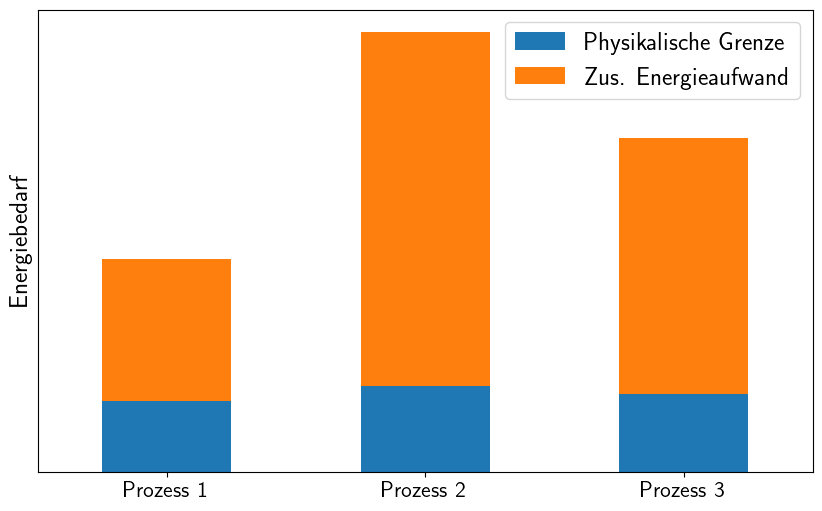

In [3]:
zusprozessenergieaufwand = [100, 250, 180]
physikalischegrenze = [50, 60, 55]
index = ['Prozess 1', 'Prozess 2', 'Prozess 3']
df = pd.DataFrame({'Physikalische Grenze': physikalischegrenze,
                  'Zus. Energieaufwand': zusprozessenergieaufwand}, index = index)

ax = df.plot.bar(stacked=True, rot = 0, yticks = [], figsize=(10,6))
ax.set_ylabel('Energiebedarf')
plt.show()

Jeder Prozess kann theoretisch physikalisch optimal ablaufen. Alternativprozesse mit gleichem Nutzen haben allerdings einen unterschiedlichen Optimalverbrauch. Falls die Möglichkeit besteht, das Verfahren zu ändern, empfiehlt sich daher vor der Optimierung der Vergleich verschiedener Verfahren, wie im Diagramm dargestellt.

DIN VDI 4663 zeigt auf, dass man zwei Perspektiven einnehmen kann: 
- der **optimale Aufwand** bzw. die **maximale Effektivität** ergibt sich, wenn man den Aufwand eines Systems für einen gegebenen Nutzen optimiert
- der **optimale Nutzen** bzw. die **maximale Effizienz** ergibt sich, wenn man den Nutzen eines Systems für einen gegebenen Aufwand optimiert

Ein festgelegter Nutzen liegt dann vor, wenn klar ist, welchen Energiewandlung ein Prozess mindestens durchführen muss, um seinen Nutzen zu erzielen.

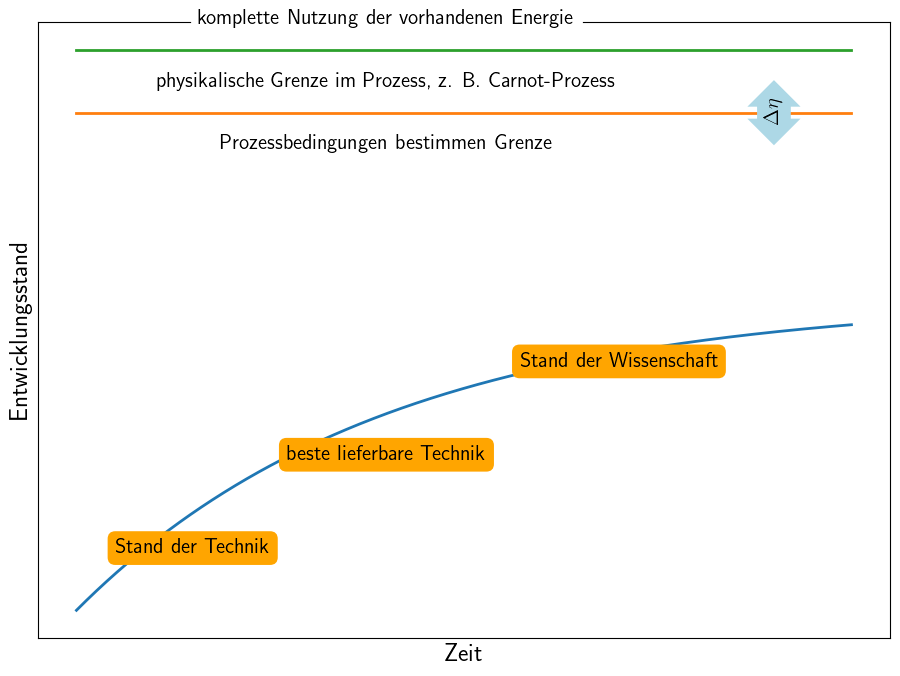

In [4]:
zeit = np.linspace(0,10,1000)
entwicklungsstand = 1-0.5*np.exp(-zeit/4)
fix, ax = plt.subplots(figsize=(11,8))
ax.plot(zeit,entwicklungsstand)
ax.text(1.5, 0.6, "Stand der Technik", ha="center", 
        va="center", rotation=0, size=15, 
        bbox=dict(boxstyle="Round,pad=0.3", fc="orange", 
                  ec="orange", lw=2))
ax.text(4, 0.75, "beste lieferbare Technik", ha="center", 
        va="center", rotation=0, size=15, 
        bbox=dict(boxstyle="Round,pad=0.3", fc="orange", 
                  ec="orange", lw=2))
ax.text(7, .9, "Stand der Wissenschaft", ha="center", 
        va="center", rotation=0, size=15, 
        bbox=dict(boxstyle="Round,pad=0.3", fc="orange", 
                  ec="orange", lw=2))
ax.set_xticks([])
ax.set_xlabel('Zeit')
ax.set_yticks([])
ax.set_ylabel('Entwicklungsstand')
ax.plot(zeit,1.3*np.ones(len(zeit)))
ax.plot(zeit,1.4*np.ones(len(zeit)))
ax.text(4, 1.35, "physikalische Grenze im Prozess, z. B. Carnot-Prozess", ha="center", 
        va="center", rotation=0, size=15, 
        bbox=dict(boxstyle="square,pad=.3", fc='white', 
                  ec='white', lw=2))
ax.text(4, 1.25, "Prozessbedingungen bestimmen Grenze", ha="center", 
        va="center", rotation=0, size=15, 
        bbox=dict(boxstyle="square,pad=.3", fc='white', 
                  ec='white', lw=2))
ax.text(4, 1.45, "komplette Nutzung der vorhandenen Energie", ha="center", 
        va="center", rotation=0, size=15, 
        bbox=dict(boxstyle="square,pad=.3", fc='white', 
                  ec='white', lw=2))
t = ax.text(9, 1.3, r"$\Delta\eta$", ha="center", va="center", 
            rotation=90, size=15, 
            bbox=dict(boxstyle="darrow,pad=0.3", fc="lightblue", 
                      ec="lightblue", lw=2))

Beispiele: 
- Warmwasserbereitung in Durchlauferhitzer
- ... in Elektroboiler

Diese Kennzahlen zeigen auf, wie stark optimiert ein Prozess ist und es lassen sich - bezogen auf einen bestimmten Nutzen - auch unterschiedliche Prozesse und Apparate vergleichen {cite:p}`carsten_keichel_methode_2017`. Im Gegensatz zu den Energieeffizienzklassen ändert sich die Bezugsgröße, die physikalisch notwendige Energie, nie.

Ein gegebener Aufwand, d.h. festgelegte Menge an zur Verfügung stehender Energie liegt z. B. bei der Erzeugungsmenge an Solarstrom auf einem Dach mit definierter Größe vor.

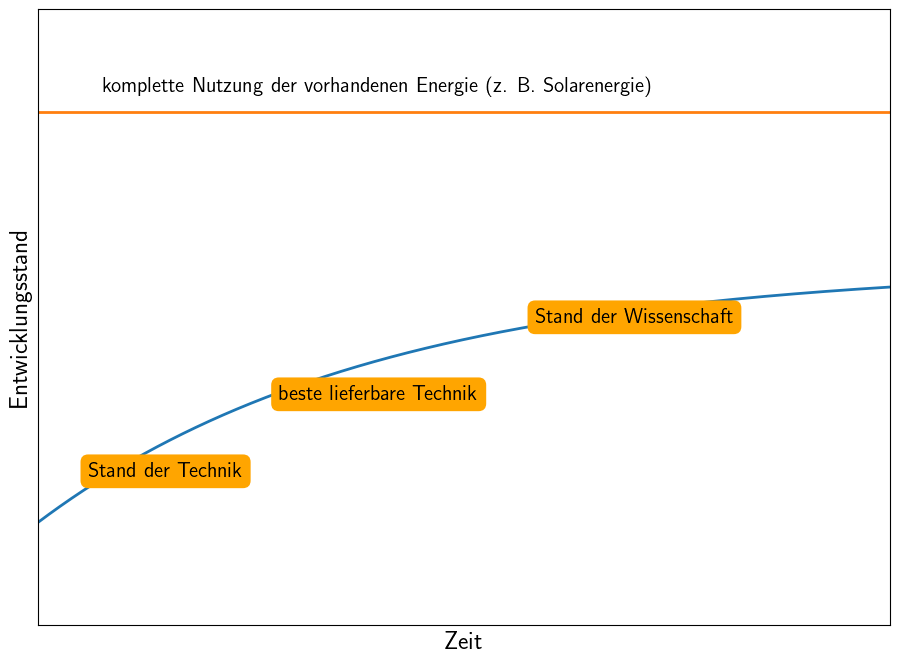

In [5]:
zeit = np.linspace(0,10,1000)
entwicklungsstand = 1-0.5*np.exp(-zeit/4)
fix, ax = plt.subplots(figsize=(11,8))
ax.plot(zeit,entwicklungsstand)
ax.text(1.5, 0.6, "Stand der Technik", ha="center", 
        va="center", rotation=0, size=15, 
        bbox=dict(boxstyle="Round,pad=0.3", fc="orange", 
                  ec="orange", lw=2))
ax.text(4, 0.75, "beste lieferbare Technik", ha="center", 
        va="center", rotation=0, size=15, 
        bbox=dict(boxstyle="Round,pad=0.3", fc="orange", 
                  ec="orange", lw=2))
ax.text(7, .9, "Stand der Wissenschaft", ha="center", 
        va="center", rotation=0, size=15, 
        bbox=dict(boxstyle="Round,pad=0.3", fc="orange", 
                  ec="orange", lw=2))
ax.set_xticks([])
ax.set_xlabel('Zeit')
ax.set_yticks([])
ax.set_ylabel('Entwicklungsstand')
ax.plot(zeit,1.3*np.ones(len(zeit)))
ax.axis([0,10,0.3,1.5])
ax.text(4, 1.35, "komplette Nutzung der vorhandenen Energie (z. B. Solarenergie)", ha="center", 
        va="center", rotation=0, size=15, 
        bbox=dict(boxstyle="Round,pad=0.3", fc='white', 
                  ec='white', lw=2))
plt.show()

## Beispiel warmer Büroarbeitsplatz

:::{admonition} **AUFGABE**
Skizzieren Sie ein Balkendiagramm unterschiedlicher Prozesse, die dazu dienen können, Sie an Ihrem Büroarbeitsplatz warm zu halten. Schätzen Sie grob sowohl die blauen (physikalisch notwendigen) als auch die orangenen (optimierbaren) Balkenanteile ab. 
:::

*Antwort:... Hinweis: Sie können ein Bild einfügen, das im selben Ordner wie dieses Notebook liegt mit dem Befehl `![Bildname](./dateiname.dateiendung)` in einer Markdown-Zelle.*

:::{bibliography}
:filter: docname in docnames
:::